(512, 512, 3)
0.018112803
127.87512195121951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.009907449
51.15004878048781


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0028579345
12.787512195121952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0010130886
5.11500487804878


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.00050557224
3.196878048780488


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.00034230365
2.55750243902439


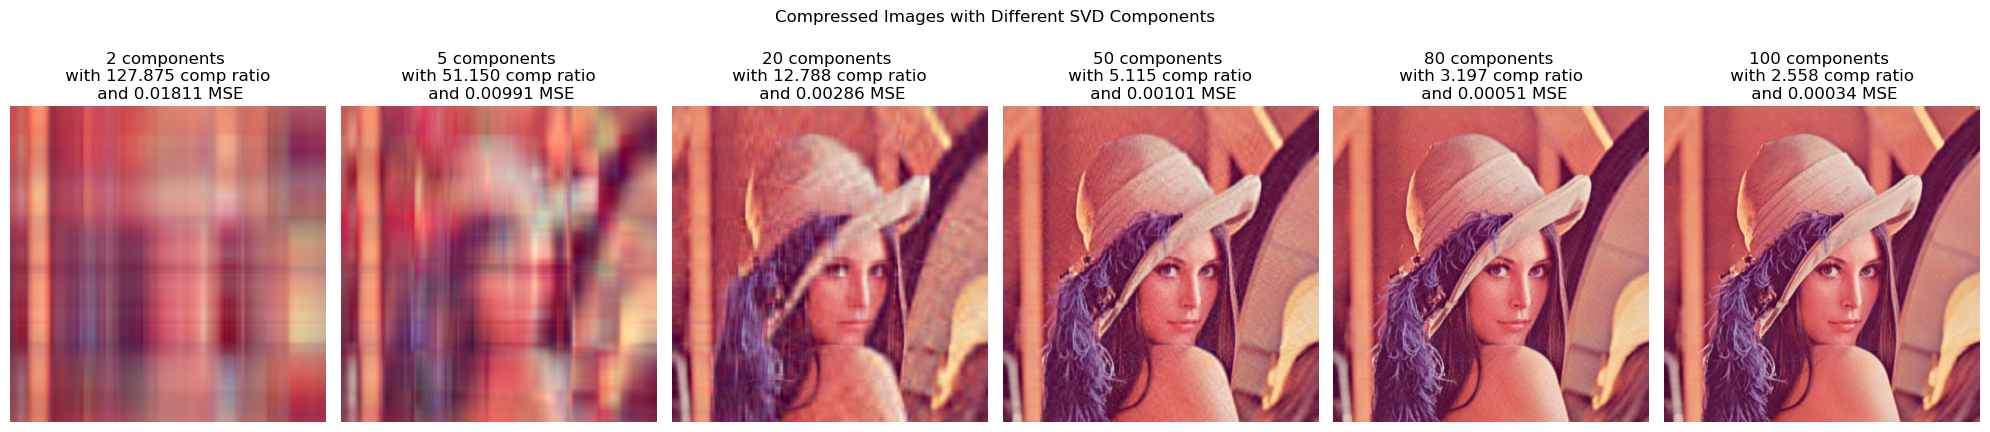

In [39]:
#Mohammad Alshurbaji
#Assignment 3 - Adv. ML - Nov. 11 2024
#Q1: Singular Value Decomposition
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
#To read the image
image = plt.imread('Lenna.png')  
original_size = np.prod(image.shape)
print(image.shape)
components = [2,5,20,50,80,100]
compressed_images = []
mse_values = []
# subplots to be more organized 
fig, axs = plt.subplots(1, len(components), figsize=(20, 5))  

for idx, r in enumerate(components):
    reconstructed_channels = []
    for i in range(3):
    # To obtained three matrices from SVD
        X = image[:,:,i]
        A,Z,Ct = np.linalg.svd(X)
        X_compressed = np.dot(A[:, 0:r], np.dot(np.diag(Z[0:r]), Ct[0:r, :]))
        reconstructed_channels.append(X_compressed)

    # Stack the reconstructed channels to form the RGB image
    compressed_image = np.stack(reconstructed_channels, axis=2)
    compressed_images.append(compressed_image)

    # Calculate Mean Squared Error (MSE) for image quality evaluation
    mse = np.mean((image - compressed_image) ** 2)
    mse_values.append(mse)
    print(mse)
    # Calculate compression ratio
    compressed_size = r * (image.shape[0] + image.shape[1] + 1) * 3
    compression_ratio = original_size / compressed_size
    compression_ratios.append(compression_ratio)
    print(compression_ratio)

    axs[idx].imshow(compressed_image)
    axs[idx].set_title(f'{r} components \n with {compression_ratio:.3f} comp ratio \n and {mse:.5f} MSE')
    axs[idx].axis('off')

# Show all images in one frame
plt.suptitle('Compressed Images with Different SVD Components')
plt.tight_layout()
plt.show()
   

In [ ]:
#Problem 3: The Burer-Monteiro method suggests if we can nd A;B, then the optimal Z to Eq. (??)
#can be recovered by ABT . It boils down to solve Eq. (??). Show that we can make use of
#least squares with ridge regression to update A;B row by row in an alternating minimization
#manner as below. Assume n = d = 2000; r = 200, please write program to nd Z.

#The Computer died here using Jupyter Notebook since my laptop isn't working properly. But I tried google colab and it worked and it gave me no zeros which proves that works correctly for the data completion. 
import numpy as np
from sklearn.linear_model import Ridge # I will use the Ridge from sklearn for simplicity
n = 2000
d = 2000
r = 200
lambd = 0.1
T = 100
X = np.random.randn(n, d)  
P = np.random.choice([0, 1], size=(n, d), p=[0.1, 0.9])  # projection operator
A = np.random.randn(n,r)
B = np.random.randn(d,r)

for t in range(T):
    # Update A row by row while fixing B
    for i in range(n):
        X_row = X[i, :] * P[i, :] #Applying projection operator to X to keep only observed entries.
        B_row = B
        #Using Ridge Method
        model = Ridge(alpha=lambd)
        model.fit(B_row, X_row)
        A[i, :] = model.coef_
    # print(A.shape)
    # Update B row by row while fixing A
    for j in range(d):
        X_col = X[:, j] * P[:, j]
        A_row = A
        #Using Ridge
        model = Ridge(alpha=lambd)
        model.fit(A_row, X_col)
        B[j, :] = model.coef_
    # print(B.shape)

# Reconstruct the matrix Z as the product of A and B
Z_hat = np.dot(A, B.T)

# Z_hat is the completed matrix approximation of X
print("Completed matrix Z_hat:", Z_hat)
print(Z_hat.shape)
has_zeros = np.any(Z_hat == 0)
print(has_zeros)